In [2]:
from glob import glob
import os
from tifffile import imread
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [30]:
x = ['train', 'valid', 'test']
for set in x:
    with open (f'/u/home/lagi/thesis/UAD_study/DDR-dataset/DR_grading/{set}.txt', 'r') as labels:
        normals = [line.split(' ')[0] for line in labels if line[-2] == '0']
        for name in normals:
            current_path = f"/u/home/lagi/thesis/UAD_study/DDR-dataset/DR_grading/{set}/{name}"
            target_path = f"/u/home/lagi/thesis/UAD_study/DDR-dataset/healthy/{name}"
            os.rename(current_path, target_path)


In [69]:



segm_list = sorted(glob('/u/home/lagi/thesis/UAD_study/DDR-dataset/lesion_segmentation/*/image/*'))
for seg in segm_list:
    x = seg.split('/')[-1].split('.')[0]
    segs = glob(f'/u/home/lagi/thesis/UAD_study/DDR-dataset/lesion_segmentation/*/label/*/{x}.tif')
    total = imread(segs[0]) + imread(segs[1]) + imread(segs[2]) + imread(segs[3])
    total = np.where (total != 0, 255, 0)
    save_path = f'/u/home/lagi/thesis/UAD_study/DDR-dataset/unhealthy/segmentations/{x}.png'
    Image.fromarray(total.save(save_path))
    break


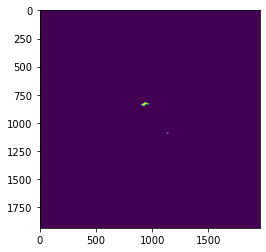

In [68]:
plt.imshow(total)